<a href="https://colab.research.google.com/github/Dimaskautsarr/KECERDASAN-BUATAN/blob/main/Macine_Leraning_Desision_Tree_DIMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-3 Classification using Decision Tree

Pada praktik kali ini, kita akan coba mengembangkan model Decision Tree yang dapat memprediski apakah seseorang beresiko menderita diabetes atau tidak.

# Import Library

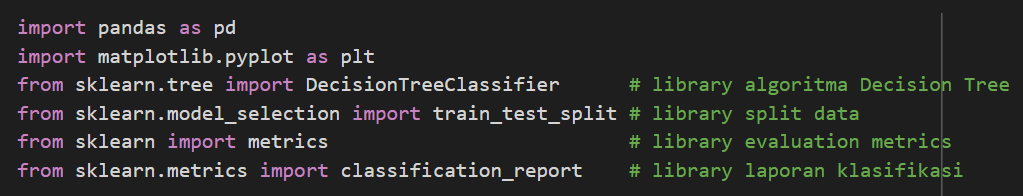

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# Load dataset


Download dataset [di sini](https://drive.google.com/file/d/1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK/view?usp=sharing)

Setelah dataset berhasil di-download, upload dataset ke Colab supaya bisa digunakan.

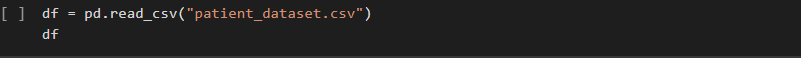

In [4]:
df = pd.read_csv("patient_dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Periksa kelengkapan dataset dengan melihat metadatanya menggunakan method `info()`.

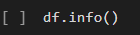

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 8 feature:
- Pregnancies
- Glucose
- BooldPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

dan satu label, yakni Outcome:

- Label 0 = tidak berpotensi menderita diabetes
- Label 1 = berpotensi menderita diabetes

# Data Exploration

**Pisahkan X dan Y dari dataset**

Salah satu kelebihan algoritma Decision Tree adalah kita tidak perlu menormalisasi feature.

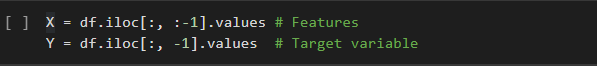

In [6]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values # Changed 'Values' to 'values'

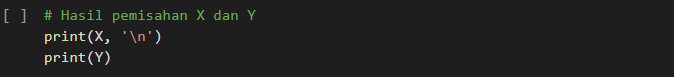

In [7]:
print(X, '\n')
print(Y)


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1

**Splitting Data**

Split data menjadi:
- training set (X_train, y_train)
- test set (X_test, y_test)

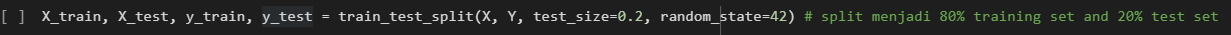

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


---

# Modeling

Algoritma Decision Tree memiliki banyak hyperparameter yang bisa kita setel (tuning hyperparameter). Empat diantaranya adalah:

Hpyerparameter | Keterangan
---|---
criterion | Fungsi untuk mengukur kualitas sebuah split
max_depth | Kedalaman maksimum tree
max_leaf_nodes | Jumlah leaf node maksimum
random_state | Mengontrol ke-random-an algoritma

Hasil tuning hyperparameter yang tepat dapat meningkatkan performa model.

**Note:**

Jika kita tidak tahu secara pasti kegunaan hyperparameter, kita bisa menggunakan setelan default dengan cara mengosongkan hyperparameter.

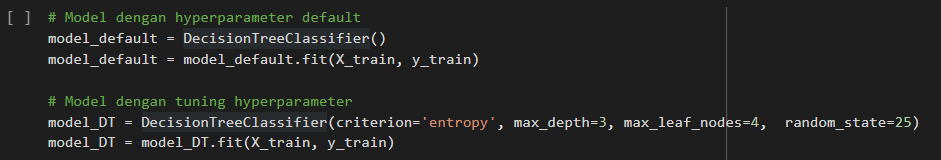

In [9]:
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, Y_train)

model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, Y_train)

---

# Evaluation

**Mengevaluasi Performa Model dengan Hyperparameter Default**

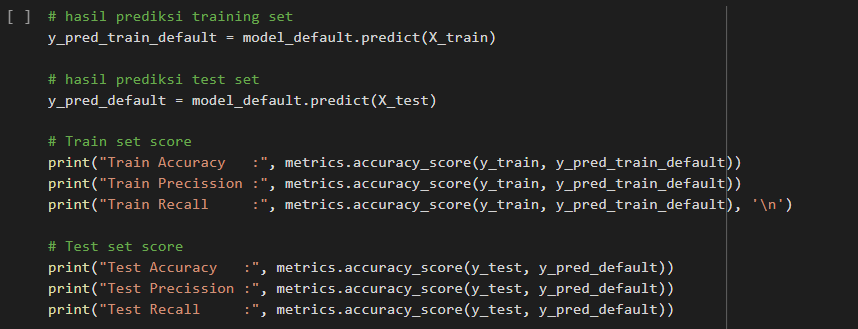

In [10]:
Y_pred_train_default = model_default.predict(X_train)
Y_pred_default = model_default.predict(X_test)

print("Train Accuracy      :", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("Train Precission    :", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("Train Recall        :", metrics.accuracy_score(Y_train, Y_pred_train_default), '\n')

# Use Y_pred_default (predictions on X_test) instead of Y_pred_train_default (predictions on X_train)
print("Test Accuracy      :", metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Precission    :", metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Recall        :", metrics.accuracy_score(Y_test, Y_pred_default))

Train Accuracy      : 1.0
Train Precission    : 1.0
Train Recall        : 1.0 

Test Accuracy      : 0.7337662337662337
Test Precission    : 0.7337662337662337
Test Recall        : 0.7337662337662337


**Mengevaluasi Performa Model dengan Tuning Hyperparameter**

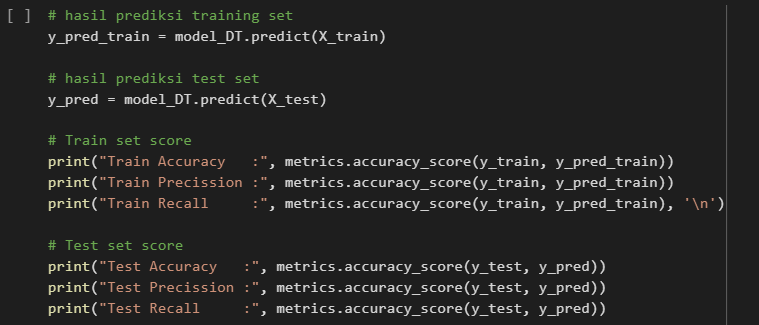

In [11]:
Y_pred_train = model_DT.predict(X_train)
Y_pred = model_DT.predict(X_test)

print("Train Accuracy      :", metrics.accuracy_score(Y_train, Y_pred_train))
print("Train Precission    :", metrics.accuracy_score(Y_train, Y_pred_train))
print("Train Recall        :", metrics.accuracy_score(Y_train, Y_pred_train), '\n')

# Use Y_pred_default (predictions on X_test) instead of Y_pred_train_default (predictions on X_train)
print("Test Accuracy      :", metrics.accuracy_score(Y_test, Y_pred))
print("Test Precission    :", metrics.accuracy_score(Y_test, Y_pred))
print("Test Recall        :", metrics.accuracy_score(Y_test, Y_pred))


Train Accuracy      : 0.7719869706840391
Train Precission    : 0.7719869706840391
Train Recall        : 0.7719869706840391 

Test Accuracy      : 0.7727272727272727
Test Precission    : 0.7727272727272727
Test Recall        : 0.7727272727272727


Berdasarkan hasil evaluasi performa:

- model dengan hyperparameter default mengalami overfitting
- model dengan tuning hyperparameter sudah **good fit**, meskipun memiliki train set score yang lebih rendah



---

**Generate Classification Report**

Kita juga dapat menampilkan hasil evaluasi model menggunakan `classification report`.

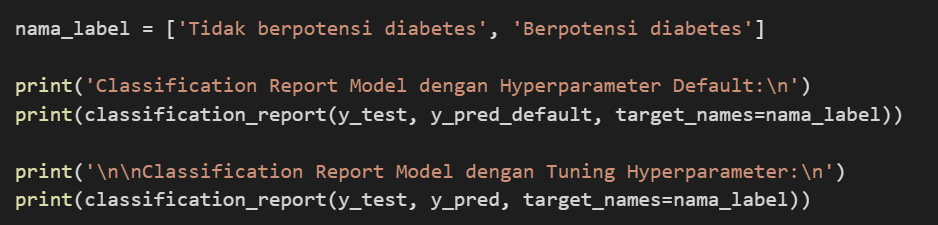

In [12]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print('Classification Report Model dengan Hayperparameter Default:\n')
print(classification_report(Y_test, Y_pred_default, target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hayperparameter :\n')
print(classification_report(Y_test, Y_pred, target_names=nama_label))

Classification Report Model dengan Hayperparameter Default:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.82      0.76      0.79        99
      Berpotensi diabetes       0.61      0.69      0.65        55

                 accuracy                           0.73       154
                macro avg       0.71      0.72      0.72       154
             weighted avg       0.74      0.73      0.74       154



Classification Report Model dengan Tuning Hayperparameter :

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification report menampilkan informasi yang lebih detail dan banyak dibanding evaluation metrics.

# Men-Generate Tree

**Tree Model dengan Hyperparameter Default**

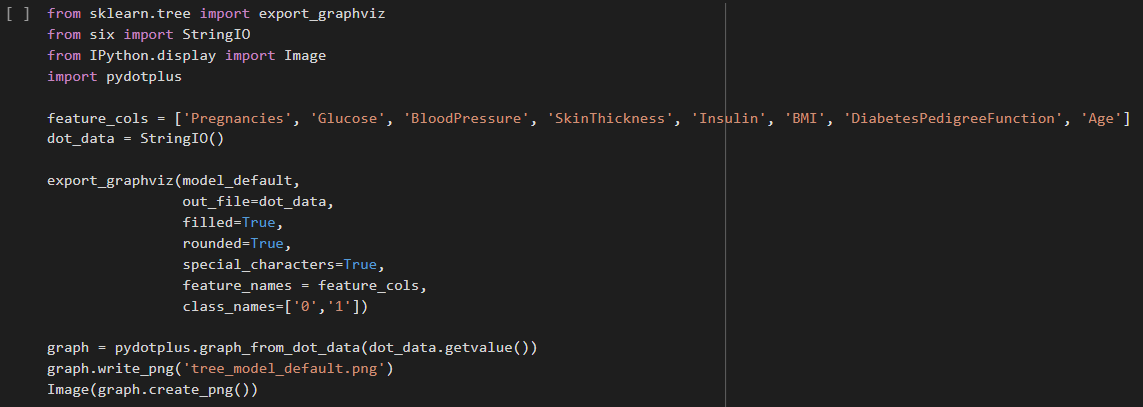

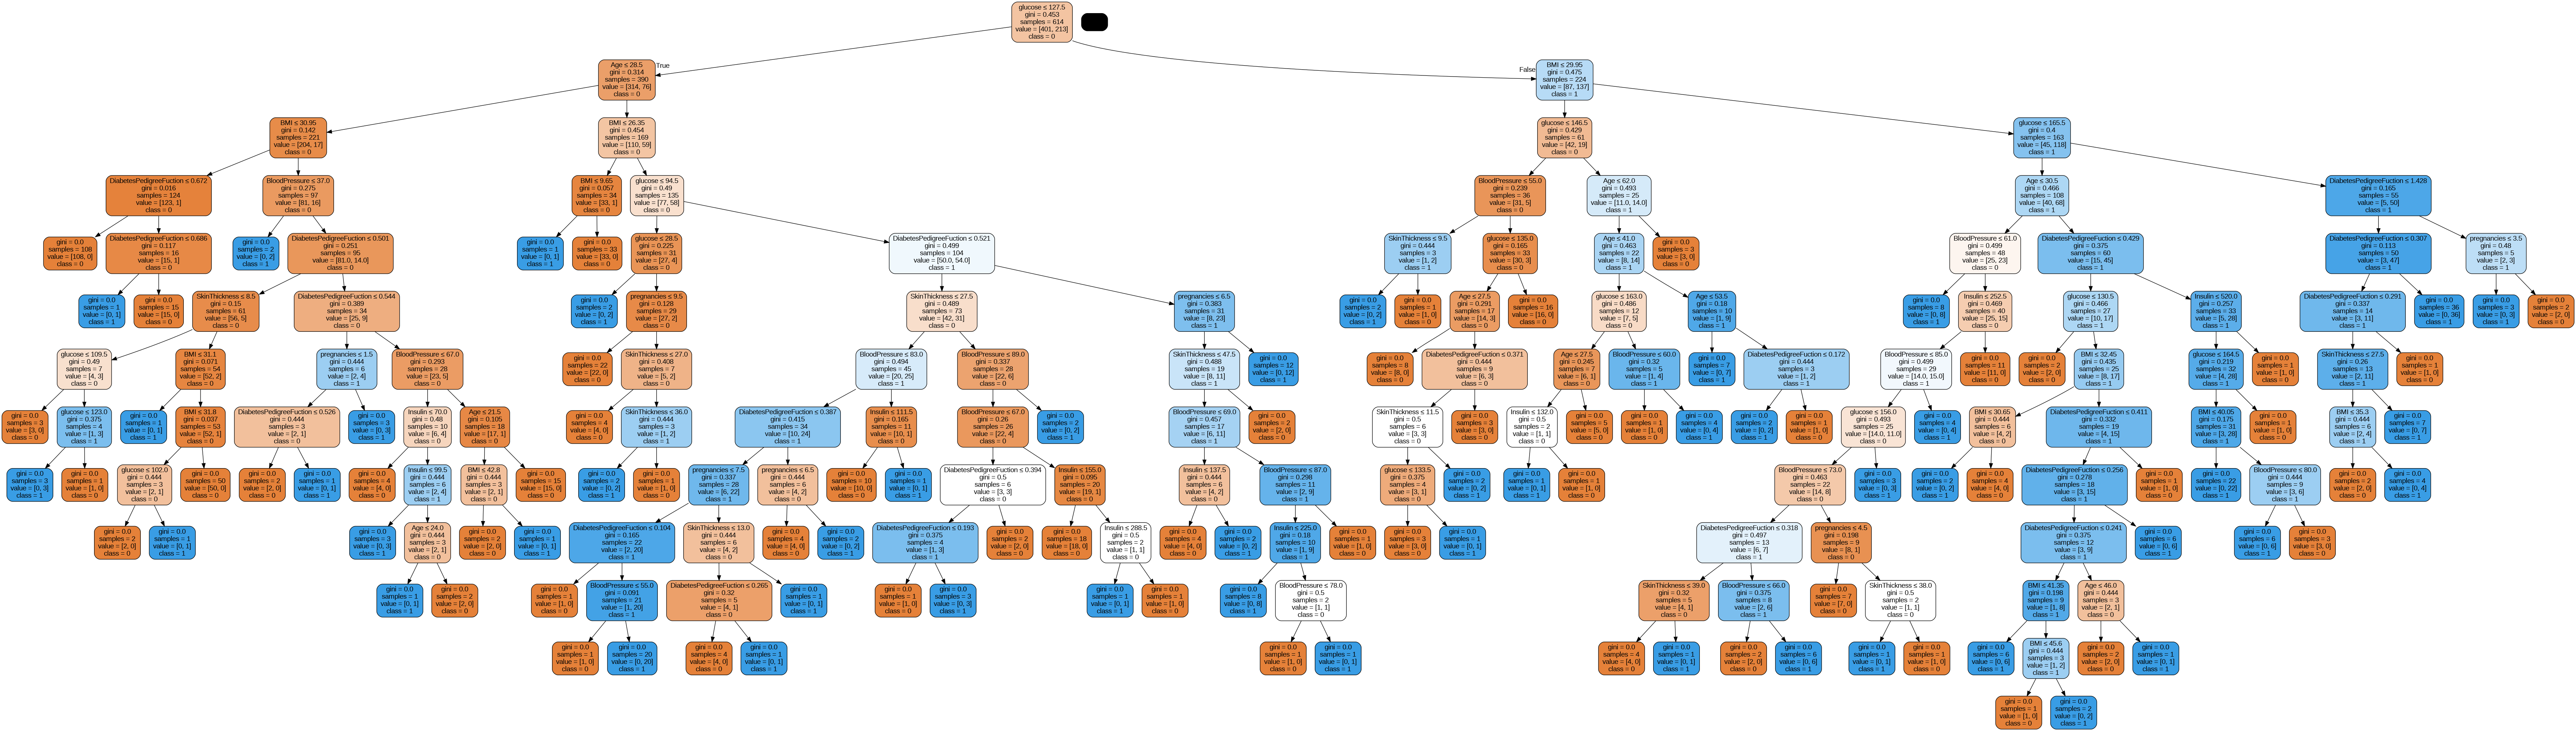

In [13]:
# Tulis di sini
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Corrected feature_cols list with 8 elements
feature_cols = ['pregnancies', 'glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFuction', 'Age']
# Added missing quote and comma to 'DiabetesPedigreeFuction'

dot_data = StringIO()

export_graphviz(model_default,
                   out_file=dot_data,
                   filled=True,
                   rounded=True,
                   special_characters=True,
                   feature_names = feature_cols,
                   class_names=['0' ,'1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

**Tree Model dengan Tuning Hyperparameter**

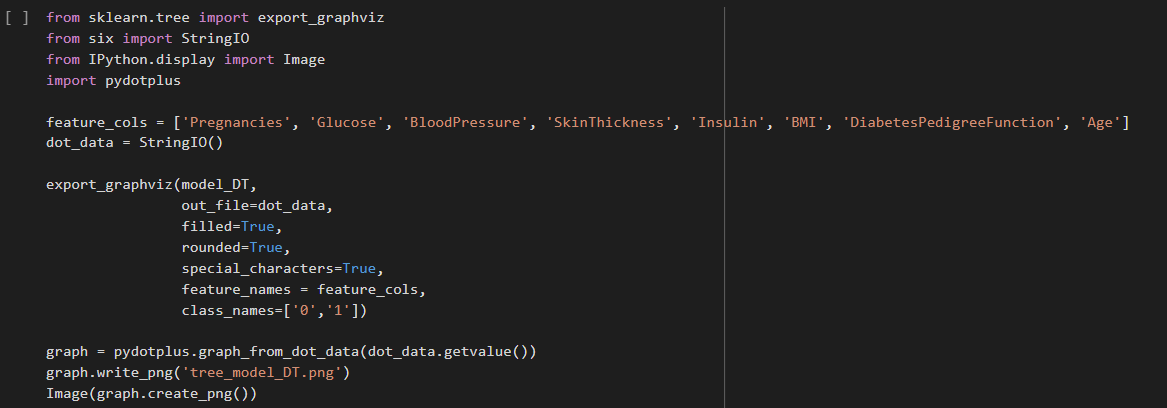

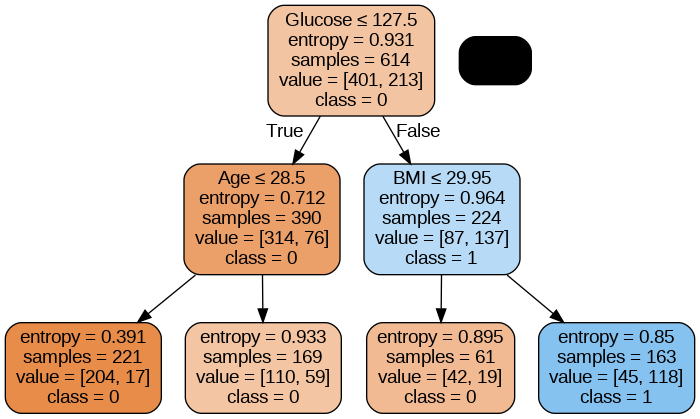

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())


Manakah tree yang lebih baik menurut kamu? Kemukakan pendapatmu beserta alasannya!

> **FYI**: Image tree bisa kita download via side menu Colab.

---

**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

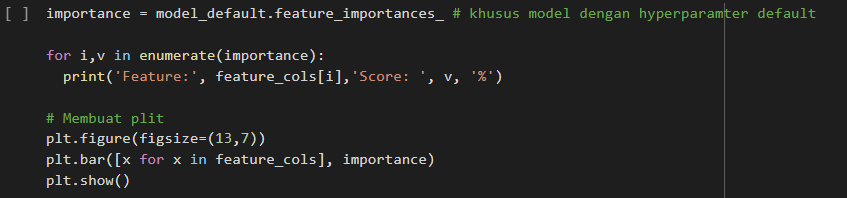

Feature: Pregnancies score:  0.04952271918904164 %
Feature: Glucose score:  0.3076200820545145 %
Feature: BloodPressure score:  0.14782623187938482 %
Feature: SkinThickness score:  0.06287829056888015 %
Feature: Insulin score:  0.06255378853115932 %
Feature: BMI score:  0.15348764119959998 %
Feature: DiabetesPedigreeFunction score:  0.11499209371696509 %
Feature: Age score:  0.10111915286045448 %


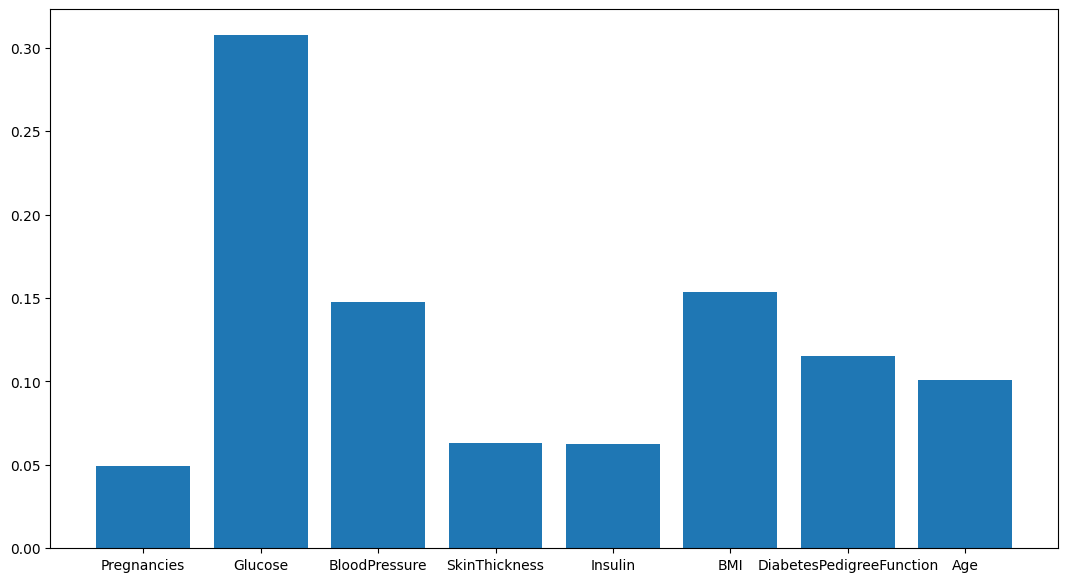

In [15]:
importance = model_default.feature_importances_

for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'score: ', v, '%')

plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()




---



# Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.



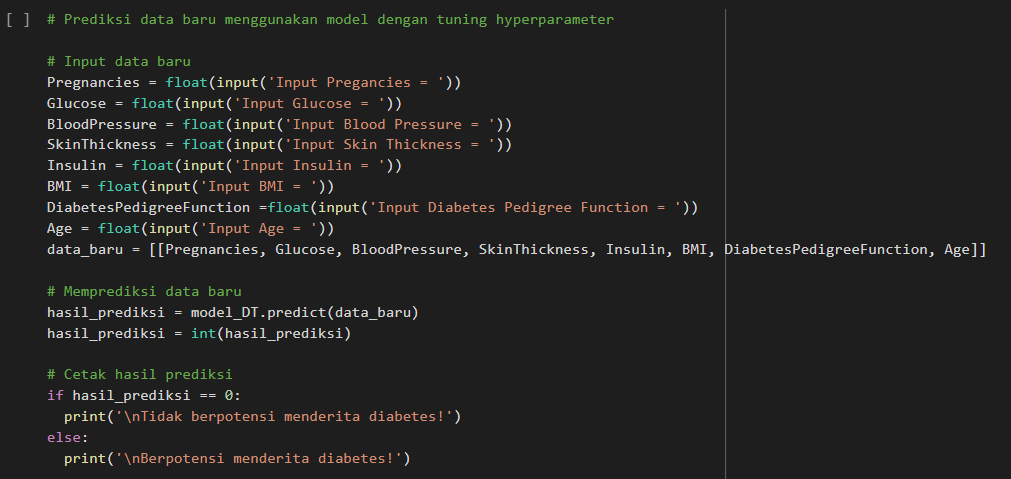

In [16]:
# Prediksi data baru menggunakan model dengan tuning hyperparameter

# Input data baru
Pregnancies = float(input('Input Pregnancies = '))
Glucose = float(input('Input Glucose = '))
BloodPressure = float(input('Input Blood Pressure = '))
SkinThickness = float(input('Input Skin Thickness = '))
Insulin = float(input('Input Insulin = '))
BMI = float(input('Input BMI = '))
DiabetesPedigreeFunction = float(input('Input Diabetes Pedigree Function = '))
Age = float(input('Input Age = '))

data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

# Memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

# Cetak hasil prediksi
if hasil_prediksi == 0:
    print('\nTidak berpotensi menderita diabetes!')
else:
    print('\nBerpotensi menderita diabetes!')



Input Pregnancies = 2
Input Glucose = 2
Input Blood Pressure = 3
Input Skin Thickness = 5
Input Insulin = 6
Input BMI = 2
Input Diabetes Pedigree Function = 1
Input Age = 4

Tidak berpotensi menderita diabetes!


<ipython-input-16-e1687f15d5a8>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil_prediksi = int(hasil_prediksi)


# Exercise (Latihan)

Lakukan pemodelan ulang menggunakan dataset yang sama!
1. Gunakan algoritma Decision Tree
2. Pilih 4 dari 8 feature yang tersedia
3. Lakukan tuning hyperparameter hingga mendapat model dengan performa terbaik
4. Generate tree model
5. Buat kesimpulan dari activity yang sudah dilakukan